<a href="https://colab.research.google.com/github/WenxuanDU/ECON441B/blob/main/HW_Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/econ441b/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [6]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)


In [7]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Run a PCA Algorithm to get 2 Principle Components for the 9 X features

In [31]:
pca = PCA(n_components=2)


principal_components = pca.fit_transform(X_scaled)

# 2.) Plot a Scatter plot of the PCs on the axis

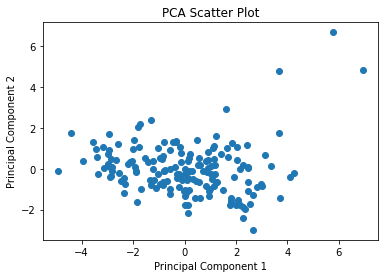

In [32]:

plt.scatter(principal_components[:, 0], principal_components[:, 1])


plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

# 3.) Rank the features in order of importance according to PCA

In [33]:
loadings = np.abs(pca.components_)

importance = np.sum(loadings, axis=0)

indices = np.argsort(importance)[::-1]

print("Features ranked in order of importance according to PCA:")
for i in indices:
    print(f"Feature {i+1}: importance = {importance[i]}")

Features ranked in order of importance according to PCA:
Feature 2: importance = 0.8970604749279515
Feature 4: importance = 0.8333030860822852
Feature 7: importance = 0.648546128247454
Feature 1: importance = 0.6124033854263224
Feature 8: importance = 0.5589620607436341
Feature 9: importance = 0.4386672200718996
Feature 5: importance = 0.42097664177580496
Feature 3: importance = 0.3939246035629781
Feature 6: importance = 0.20157740025087162


# 4.) Plot a heatmap of the feature importance (Fill in all parameters)

In [34]:
feature_names = df.columns[1:]

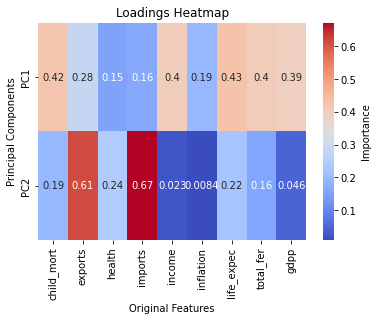

In [35]:

sns.heatmap(np.abs(pca.components_), annot= True, cmap='coolwarm', xticklabels=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'], yticklabels=['PC1', 'PC2'], cbar_kws={'label':'Importance'})

plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('Loadings Heatmap')
plt.show()

In [20]:
feature_names

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

# 5.) Plot a correlation plot of the original features. What do you notice between the graphs of 4 & 5?

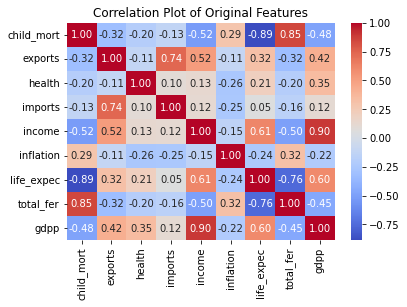

In [37]:
corr_matrix = df.iloc[:, 1:].corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

plt.title('Correlation Plot of Original Features')

plt.show()

I noticed that exports and imports are the two most import features in the dataset for PC1, but they are not as important within the data (correlations with other features). This might indicate that these two features are important when it comes to explaining the overall variance within hte dataset,

# 6.) Run a PCA with 9 PCs. Plot a Cumulative Explained Variance Plot. How many PCs should we use if we want to retain 95% of the variance?

In [38]:
pca = PCA(n_components=9)

pca.fit_transform(X_scaled)


array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [39]:
pca.explained_variance_ratio_


array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

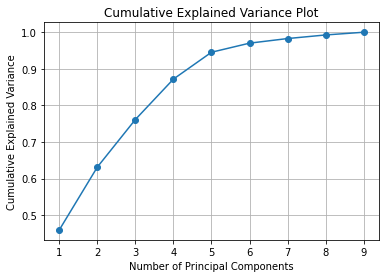

In [40]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

In [42]:
np.cumsum(pca.explained_variance_ratio_)

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

To retain 95% of the variance, we should use 6 PCs PCA.